Import necessary packages.

In [11]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

# Class example: Bertocchi et al. AEJ Policy 2020 example---the incumbent politician's choice

In this notebook, we focus on the choice problem of a politician in their paper. We will treat other components of their model as given, and solve the choice problem of one politician. Specifically, we will:
1. rely on their solutions on the probability of each politician winning the election;
2. take the choices of the political rival as given.

## Setup of a politician's model

A political candidate, $\zeta \in \{I,C\}$, proposes a policy platform, by choosing three elements $q_{\zeta} = (\tau_{\zeta}, e_{\zeta}, R_{\zeta})$, where
* $\tau_{\zeta}$ is the rate of taxation on wealth;
* $e_{\zeta}$ is public expenditure on education;
* $R_{\zeta}$ is electoral rent, i.e., other public expenditure that benefits the political candidate. 

The politician is constrained by the government budget constraint

$$ e_{\zeta} + R_{\zeta} = [\tau_{\zeta} - D(\tau_{\zeta})]\omega, $$

where 
* $\omega$ is total wealth of the jurisdiction; 
* $D(\tau_{\zeta}) = \frac{1}{2}\tau_{\zeta}^2$ is the cost of taxation, that is increasing and convex in $\tau_{\zeta}$.

## Setup the optimization program for the incumbent politician

The incumbent politician I's optimization problem is
\begin{align}
    \max_{\tau_I, e_I, R_I}\quad & p_I(q_I, q_C)\cdot R_I \\
    \text{s.t.}\quad &  \big(\tau_I - \frac{1}{2}\tau_I^2\big)\omega = e_I + R_I
\end{align}

Given the voter's model in the paper, the winning probability of the incumbent is (see more details at the end of this notebook)

$$p_I(q_I, q_C) = \frac{1}{2} + \phi + (\tau_C-\tau_I)\omega + (e_I-e_C) \sigma^T, $$
where 
$$ \sigma^T = \sigma\lambda^y + (1-\sigma)\lambda^o $$

and 
* $\phi$ is incumbency advantage
* $\lambda^y$ and $\lambda^o$ are young and old voters' marginal benefit from education, respectively
* $\sigma$ is independent of politician's policy platform (see more details at the end of this notebook), which is
    * increasing in the fraction of the young population, $\alpha$
    * decreasing in the voting cost of the young population




Thus, the incumbent politician's program becomes

\begin{align}
    \max_{\tau_I, e_I, R_I} \quad & \Big( \frac{1}{2} + \phi + (\tau_C-\tau_I)\omega + (e_I-e_C)\sigma^T \Big)\cdot R_I \\
    \text{s.t.}\quad & \big(\tau_I - \frac{1}{2}\tau_I^2\big)\omega = e_I + R_I
\end{align}

## Solve the problem using sympy

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [12]:
phi, tauC, tauI, omega, eI, eC, sigma, sigmaT, lamY, lamO, RI, RO = symbols('phi, tau_C, tau_I, omega, e_I, e_C, sigma, sigma^T, lambda^y, lambda^o, R_I, R_O')

In [13]:
sigmaT

## Setup the incumbent's objective function

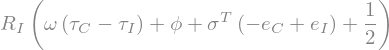

In [14]:
# define the winning probability
pI = Rational(1,2) + phi + (tauC - tauI)*omega + (eI - eC)*sigmaT
# define the objective function
uI =  pI * RI
# show the defined function
uI

## Setup the lagrangian

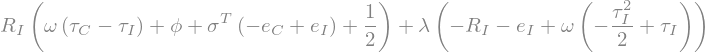

In [15]:
lam = symbols('lambda')
# note: power in sympy is **
lagr = uI + lam *( (tauI - Rational(1,2) * tauI**2)*omega  - eI - RI )
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

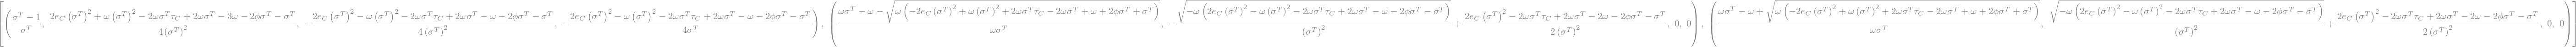

In [16]:
foc_sol = solve(( diff(lagr,tauI), diff(lagr,eI), diff(lagr,RI), diff(lagr,lam) ), tauI,eI,RI,lam)
foc_sol

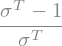

In [17]:
# incumbent's optimal tax rate policy in response to rivals and voters is
tauI_sol = foc_sol[0][0]
tauI_sol

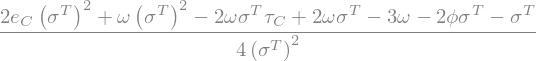

In [18]:
# incumbent's optimal education expenditure policy in response to rivals and voters is
eI_sol = foc_sol[0][1]
eI_sol

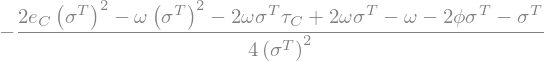

In [19]:
# incumbent's optimal political rent policy in response to rivals and voters is
RI_sol = foc_sol[0][2]
RI_sol

## Comparative statics: Incumbent politician's education policy platform in response to political rival's policy

In [20]:
eI_sol.diff(eC)

## Appendix: more details on the incumbent's winning probability

From the voter's model (see derivation in Appendix of the paper), the winning probability for the incumbent is
\begin{align}
    p_I(q_I,q_C) &= Pr(\pi_I \geq \pi_C) \\
        &= \frac{1}{2} + \phi + \sigma\big(U^y(q_I) - U^y(q_C)\big) + (1-\sigma) \big(U^o(q_I) - U^o(q_C)\big) \tag{1}
\end{align}
where 
* $\phi$ is a measure of incumbency advantage; 
* $\sigma = \frac{\alpha}{\alpha + (1-\alpha)\frac{\bar{c}^y}{\bar{c}^o}}$ is independent of politician's polity platform, but is a function of
    - $\alpha$: the share of young in population
    - $\bar{c}^y$ and $\bar{c}^o$: the upper bounds of each voter group's voting cost

The paper models voter's utility from politician $\zeta$'s policy platform as
\begin{align}
    U^y(q_{\zeta}) &= (1-\tau_{\zeta})\omega + \lambda^y e_{\zeta} \\
    U^o(q_{\zeta}) &= (1-\tau_{\zeta})\omega + \lambda^o e_{\zeta}
\end{align}
thus 
\begin{align}
    U^y(q_I) - U^y(q_C) &= (\tau_C-\tau_I)\omega + \lambda^y (e_I-e_C) \\
    U^o(q_I) - U^o(q_C) &= (\tau_C-\tau_I)\omega + \lambda^o (e_I-e_C)
\end{align}

Plugging this into (1), we have
\begin{align}
    p_I(q_I,q_C) &= \frac{1}{2} + \phi + \sigma\big(U^y(q_I) - U^y(q_C)\big) + (1-\sigma) \big(U^o(q_I) - U^o(q_C)\big) \\
    &= \frac{1}{2} + \phi + \sigma\big( (\tau_C-\tau_I)\omega + \lambda^y (e_I-e_C) \big) + (1-\sigma) \big( (\tau_C-\tau_I)\omega + \lambda^o (e_I-e_C) \big) \\
    &= \frac{1}{2} + \phi + (\tau_C-\tau_I)\omega + (e_I-e_C)\big( \sigma\lambda^y + (1-\sigma)\lambda^o \big)
\end{align}